In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from livelossplot import PlotLossesKerasTF

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(1234)
 
import datasets
import losses
import models
import build

In [2]:
#scores = tf.constant(np.arange(1,6), shape=[5,1], dtype=tf.float32)
#t = tf.constant([[0.2,0.2,0.2,0.2,0.2],[0.1,0.4,0.0,0.4,0.1]], shape=[2,5], dtype=tf.float32)
#tf.linalg.matmul(t**2, scores)

In [3]:
base, trainable, preprocess_input = models.ResNet44()

In [4]:
dataset, n = datasets.SCUTFBP5500(input_shape=base.input_shape)
#dataset, n = datasets.MEBeauty(input_shape=base.input_shape)
dataset.generate(model=base, preprocess_input=preprocess_input, augment=0)

69/69 [==============================] - 1s 18ms/step
(3300, 14, 14, 1024) (2200, 14, 14, 1024)
(3300, 5) (2200, 5)


In [5]:
model = build.build(
    base.output_shape,
    trainable=trainable,
    n=n,
    augment=False,
    train=0.5,
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 1, 1, 2048)        6049792   
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

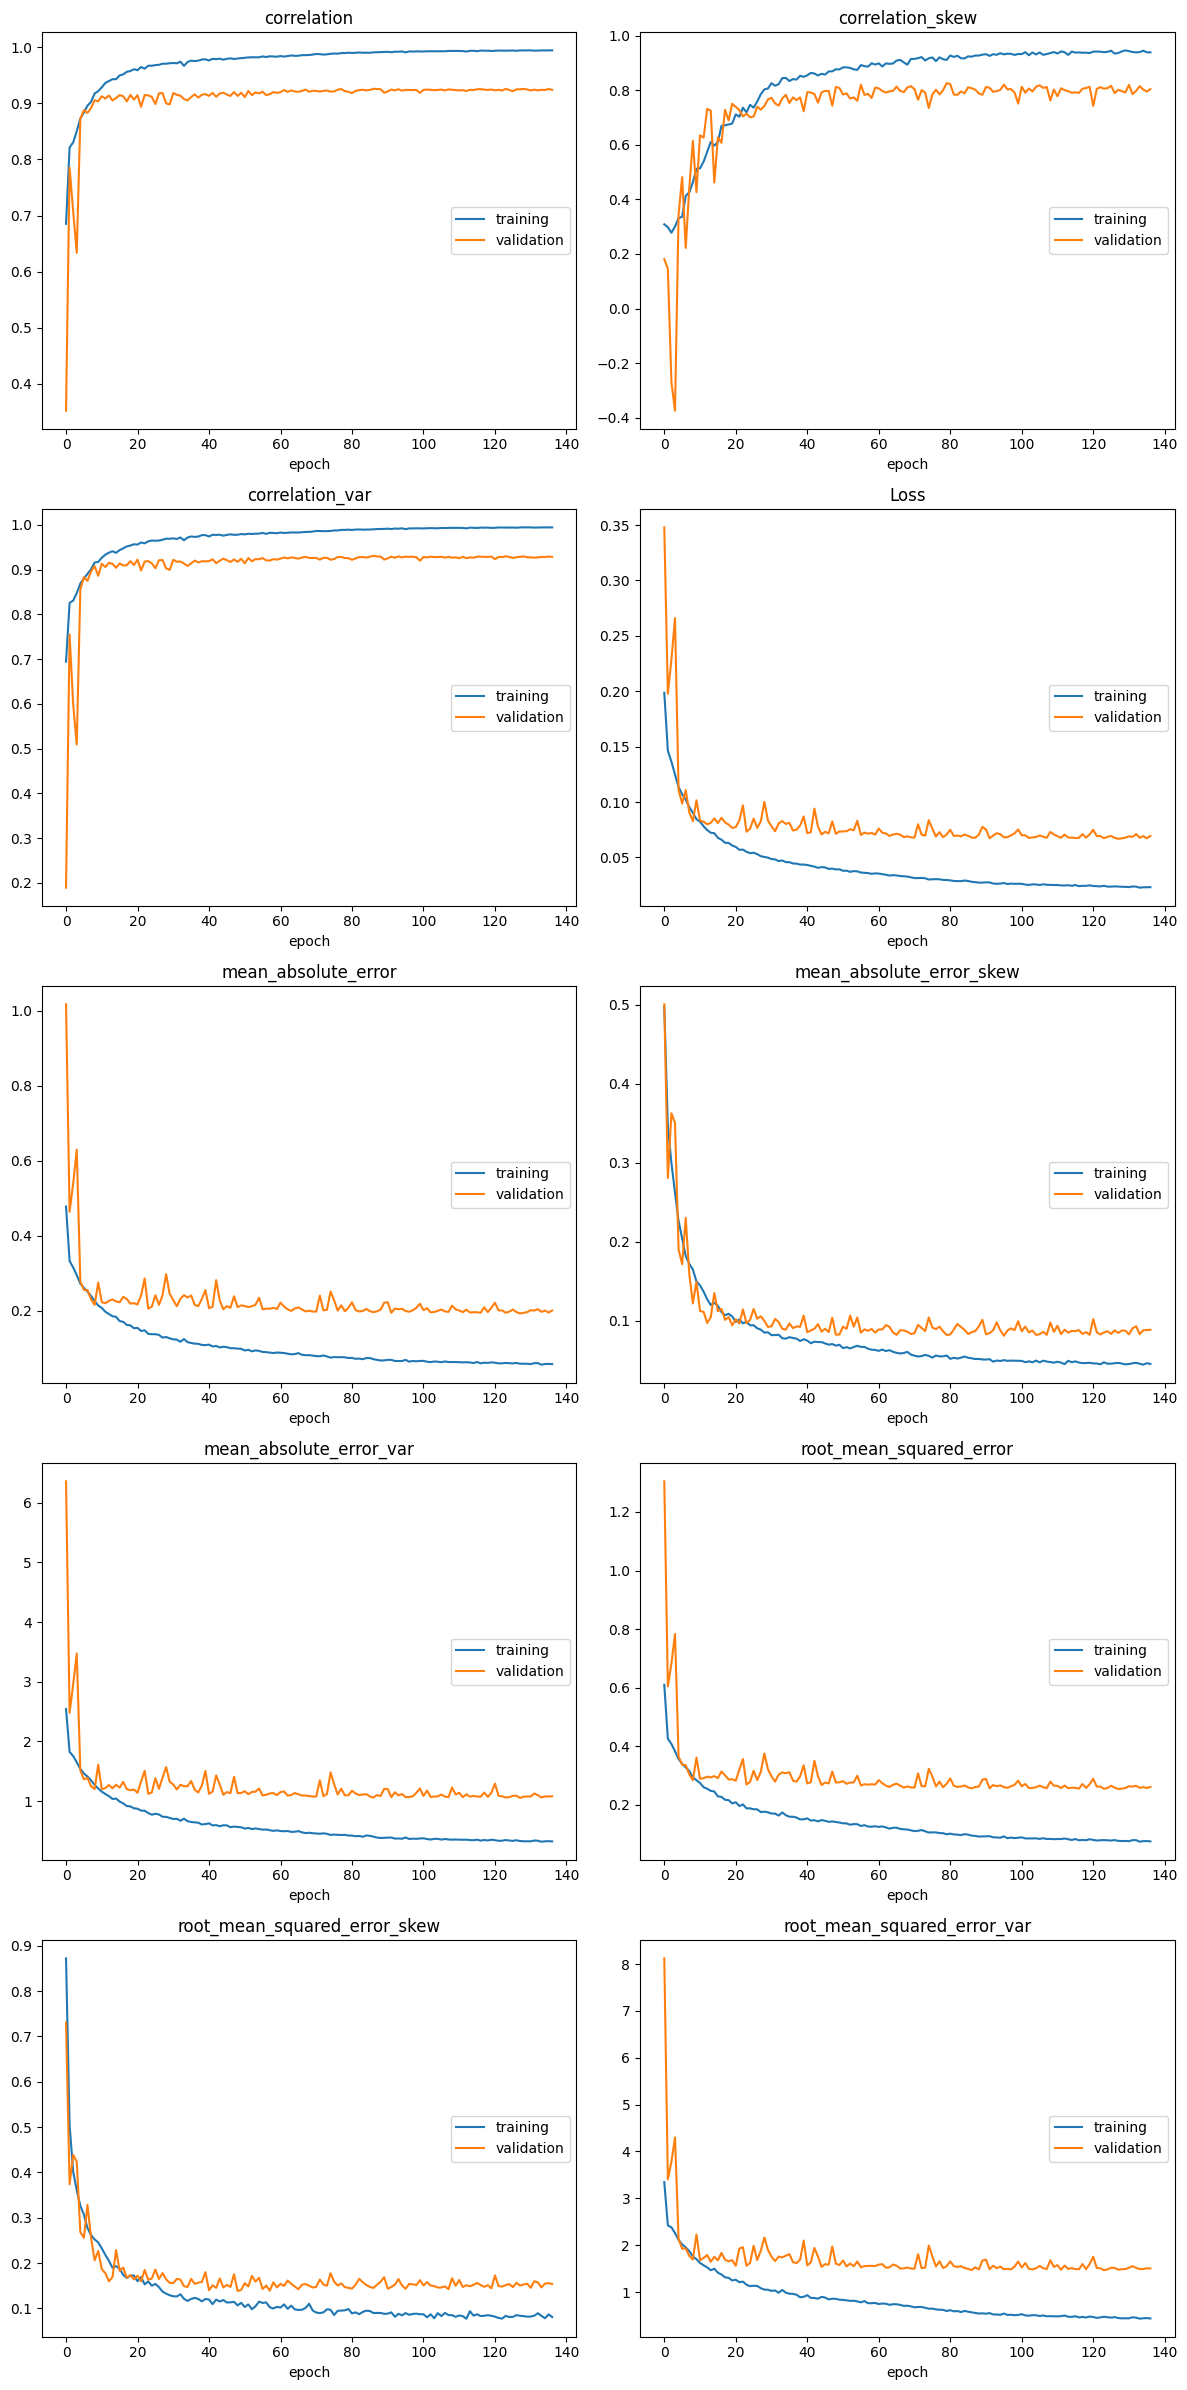

correlation
	training         	 (min:    0.685, max:    0.994, cur:    0.994)
	validation       	 (min:    0.352, max:    0.926, cur:    0.924)
correlation_skew
	training         	 (min:    0.278, max:    0.946, cur:    0.938)
	validation       	 (min:   -0.374, max:    0.826, cur:    0.804)
correlation_var
	training         	 (min:    0.694, max:    0.995, cur:    0.994)
	validation       	 (min:    0.189, max:    0.931, cur:    0.929)
Loss
	training         	 (min:    0.023, max:    0.199, cur:    0.023)
	validation       	 (min:    0.067, max:    0.348, cur:    0.069)
mean_absolute_error
	training         	 (min:    0.056, max:    0.478, cur:    0.058)
	validation       	 (min:    0.193, max:    1.017, cur:    0.201)
mean_absolute_error_skew
	training         	 (min:    0.045, max:    0.498, cur:    0.046)
	validation       	 (min:    0.081, max:    0.501, cur:    0.089)
mean_absolute_error_var
	training         	 (min:    0.319, max:    2.543, cur:    0.325)
	validation       	 (mi

8.694940841666675

In [6]:
metrics = [losses.MeanAbsoluteError(n=n),
           losses.RootMeanSquaredError(n=n),
           losses.PearsonCorrelation(n=n),
           losses.MeanAbsoluteError(n=n, mode="var"),
           losses.RootMeanSquaredError(n=n, mode="var"),
           losses.PearsonCorrelation(n=n, mode="var"),
           losses.MeanAbsoluteError(n=n, mode="skew"),
           losses.RootMeanSquaredError(n=n, mode="skew"),
           losses.PearsonCorrelation(n=n, mode="skew")]

#loss = tf.keras.losses.CategoricalCrossentropy()
loss = losses.SquaredEarthMoversDistance()

#dataset.shuffle()
build.compile(model, loss, metrics=metrics, learning_rate=0.0006)
build.train(
    model, 
    dataset.train, 
    dataset.test,
    monitor="val_correlation",
    callbacks=[PlotLossesKerasTF()]
)

In [7]:
model.evaluate(dataset.test)

69/69 [==============================] - 1s 12ms/step - loss: 0.0679 - mean_absolute_error: 0.1965 - root_mean_squared_error: 0.2562 - correlation: 0.9259 - mean_absolute_error_var: 1.0597 - root_mean_squared_error_var: 1.4700 - correlation_var: 0.9310 - mean_absolute_error_skew: 0.0858 - root_mean_squared_error_skew: 0.1454 - correlation_skew: 0.8069


[0.06791217625141144,
 0.19652621448040009,
 0.2561931908130646,
 0.9259002208709717,
 1.0596518516540527,
 1.47002375125885,
 0.9309746623039246,
 0.0857553631067276,
 0.14535722136497498,
 0.8069435358047485]